In [48]:

import numpy as np
import pandas as pd

from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from scipy import optimize

import matplotlib.pyplot as plt 

In [46]:

new_test = np.load("./test_final.npy")
new_train = np.load( "./train_final.npy")

labels = pd.read_csv("../data/labels_train.csv" , header = None )[1].values
test_ids = pd.read_csv("../data/ids_test.csv" , header = None)[1].values

In [20]:
new_train.shape

(307511, 32)

In [102]:
new_train.shape

(307511, 32)

In [101]:
def gini(actual, pred):
    assert (len(actual) == len(pred))
    all = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=np.float)
    all = all[np.lexsort((all[:, 2], -1 * all[:, 1]))]
    totalLosses = all[:, 0].sum()
    giniSum = all[:, 0].cumsum().sum() / totalLosses

    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)

In [81]:
def f( ws ) :
    valid_preds = np.average(  new_train  , axis = 1 ,  )
    
    return valid_preds

In [104]:
def loss_function(ws):
    
    preds_weighted = f(ws)
    #score = roc_auc_score( labels , preds_weighted  )
    score = gini( labels  , preds_weighted )
    #score = log_loss( labels , preds_weighted )
    #print('loss', np.sum(n_lost) / len(y_valid_pred_cls), 'current weights', weights)
    return 1.0/score

In [105]:
opt_weights = optimize.minimize(loss_function,
                                [1/32.0] * 32,
                                constraints=({'type': 'eq','fun': lambda w: 1-sum(w)}),
                                method= 'Nelder-Mead', #'SLSQP',
                                bounds=[(0.0, 1.0)] *32 ,
                                options = {'ftol':1e-10} )['x']

0.26308477182566536

In [100]:
opt_weights.max()

2.0737511630167678

In [98]:
opt_weights.sum()

13.089380673038832

In [99]:
loss_function( opt_weights )

1.638224256806011

In [87]:

aa = np.average( new_train , axis = 1 , weights = opt_weights )

In [88]:
aa

array([0.82771904, 0.24177856, 0.30691944, ..., 0.45666008, 0.43062319,
       0.50363452])

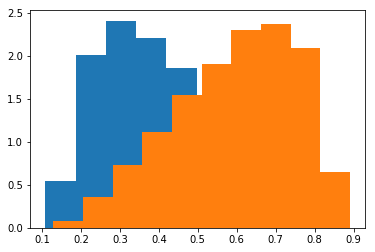

In [89]:
plt.hist( aa[ labels == 0 ] , density = True )
plt.hist( aa[ labels == 1 ] , density = True )
plt.show()

In [90]:
preds_test =  np.average( new_test , axis = 1 , weights = opt_weights )

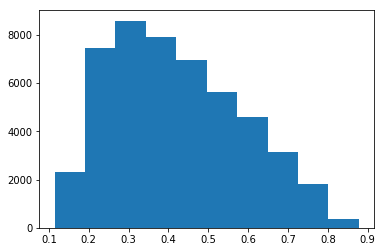

In [91]:
plt.hist( preds_test )
plt.show()

In [92]:
opt_weights

array([-0.41147128,  0.36515076,  0.65213486,  2.0145857 , -0.00427958,
       -0.22443569, -0.19391931,  0.05685522,  1.3987352 ,  0.06607292,
        0.65660221,  0.48152143,  2.07375116,  0.22617538, -0.11074354,
       -0.08213985,  1.0789176 ,  0.03972327,  0.60021669, -0.31612399,
        0.48364864, -0.07043809,  1.73193496, -0.33252293,  0.19823678,
        0.71909243, -0.06285223,  1.22853885, -0.50639912,  0.76149997,
        0.08449125,  0.48682099])

In [93]:
preds_test = np.clip(  preds_test , 0 , 1.0 )

In [94]:
pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': preds_test }).to_csv('../data/pred_test_pow.csv', index=False)

In [95]:
roc_auc_score(  labels , aa )

0.7869864400128421

In [96]:
log_loss( labels , aa )

0.5779831474254995